**General Steps**
1. Import Data
2. Examine Data (EDA) 
    - understand the data
3. Split into train/test if such a split doesn't already exist
    - depends on CV strategy
4. Feature Engineering / Preprocessing Pipeline
5. Model Training
6. Evaluation

In [3]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [9]:
# import data
data_path = pathlib.Path.cwd() / "titanic"
df_data = pd.read_csv(data_path / "train.csv")

# Examine Data

### Data dictionary
* PassengerId is the unique id of the row and it doesn't have any effect on target
* Survived is the target variable we are trying to predict (0 or 1):
    * 1 = Survived
    * 0 = Not Survived
* Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    * 1 = Upper Class
    * 2 = Middle Class
    * 3 = Lower Class
* Name, Sex and Age are self-explanatory
    * name could be useful for feature extraction?
* SibSp is the total number of the passengers' siblings and spouse -> numeric
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
    * **note:** can get rid of this
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

In [3]:
df_data.shape

(891, 12)

In [4]:
for i in df_data.columns:
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [5]:
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df_missing_count = df_data.isnull().sum().to_frame(name="missing_count")
df_missing_frac = df_data.isnull().mean().to_frame(name="missing_frac")
pd.merge(df_missing_count, df_missing_frac, left_index=True, right_index=True)

,missing_count,missing_frac
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [9]:
df_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
cols_to_drop = ['Name','PassengerId', 'Ticket']
numerical_cols = ['Age', 'SibSp','Parch', 'Fare']
cat_ordinal = ['Pclass','Sex', 'Embarked']
other = ['Cabin']
target = ['Survived']

# quick check to see that we got all relevant cols
print(set(df_data.columns) - set(cols_to_drop + numerical_cols + cat_ordinal + other + target))
print(set(cols_to_drop + numerical_cols + cat_ordinal + other + target) - set(df_data.columns))

set()
set()


### other

In [16]:
df_data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
df_data["Cabin"].sort_values(ascending=False, key=lambda x: x.str.len()).head(40)

742    B57 B59 B63 B66
311    B57 B59 B63 B66
679        B51 B53 B55
88         C23 C25 C27
872        B51 B53 B55
438        C23 C25 C27
27         C23 C25 C27
341        C23 C25 C27
297            C22 C26
498            C22 C26
299            B58 B60
118            B58 B60
789            B82 B84
97             D10 D12
305            C22 C26
802            B96 B98
700            C62 C64
390            B96 B98
763            B96 B98
435            B96 B98
75               F G73
699              F G63
715              F G73
128              F E69
711               C124
712               C126
717               E101
268               C125
889               C148
298               C106
303               E101
669               C126
331               C124
609               C125
351               C128
571               C101
449               C104
452               C111
3                 C123
737               B101
Name: Cabin, dtype: object

In [18]:
def get_deck(val):
    if pd.notnull(val):
        return val[0]
    else:
        return "M"
df_data["Deck"] = df_data["Cabin"].apply(get_deck)

In [19]:
cat_ordinal.append("Deck")
cat_ordinal

['Pclass', 'Sex', 'Embarked', 'Deck']

### categorical data
- look at distributions and number of levels 
- see if anything odd is going on with the data

In [20]:
df_data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked,Deck
count,891,891,891,204,889,891
unique,891,2,681,147,3,9
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,M
freq,1,577,7,4,644,687


Pclass
   counts  fraction
3     491  0.551066
1     216  0.242424
2     184  0.206510


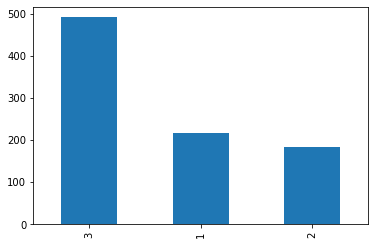

Sex
        counts  fraction
male       577  0.647587
female     314  0.352413


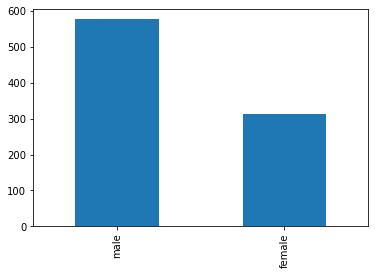

Embarked
   counts  fraction
S     644  0.724409
C     168  0.188976
Q      77  0.086614


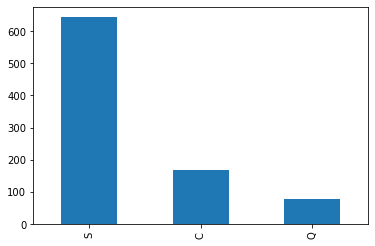

Deck
   counts  fraction
M     687  0.771044
C      59  0.066218
B      47  0.052750
D      33  0.037037
E      32  0.035915
A      15  0.016835
F      13  0.014590
G       4  0.004489
T       1  0.001122


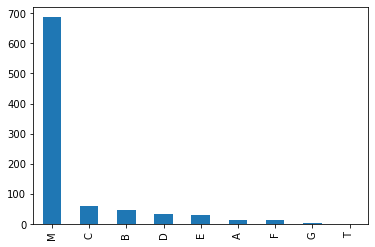

In [21]:
def get_value_counts(df, col_names):
    for col in col_names:
        print(col)
        df_counts = df[col].value_counts().to_frame(name="counts")
        df_fraction = df[col].value_counts(normalize=True).to_frame(name="fraction")
        print(pd.merge(df_counts, df_fraction,left_index=True, right_index=True))
        df[col].value_counts().plot(kind = 'bar')
        plt.show()
        
get_value_counts(df_data, cat_ordinal)

In [22]:
# https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

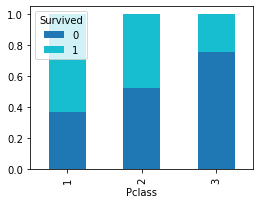

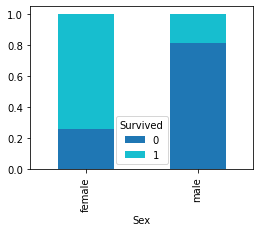

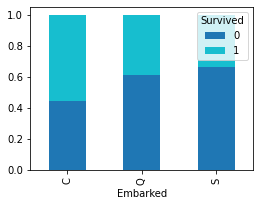

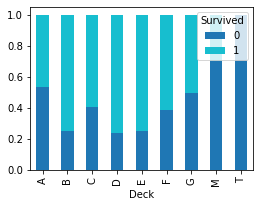

In [23]:
for col in cat_ordinal:
    plt.figure
    pd.crosstab(df_data[col], df_data['Survived'], normalize="index").plot(kind='bar', stacked=True, 
                                                                              colormap='tab10', figsize=(4, 3))
    plt.show()

In [24]:
# df_data.groupby(['Deck', 'Survived']).size().unstack()
# df_data.groupby(['Deck']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

### Numerical data


In [25]:
df_data.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age


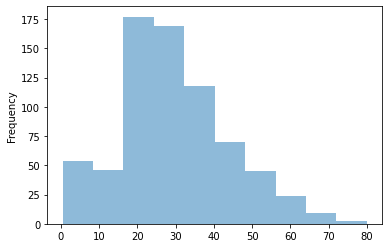

SibSp


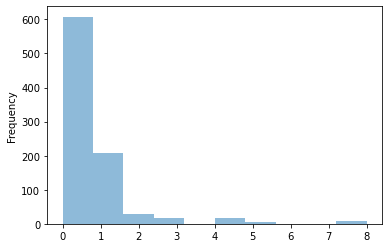

Parch


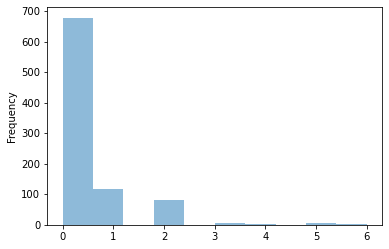

Fare


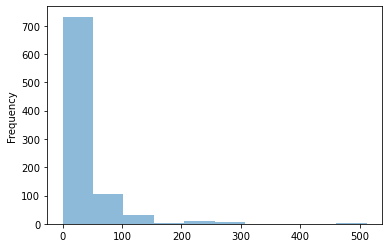

In [26]:
def plot_distribution(df, col_names):
    for col in col_names:
        print(col)
        df[col].plot.hist(alpha=0.5)
        plt.show()
plot_distribution(df_data, numerical_cols)

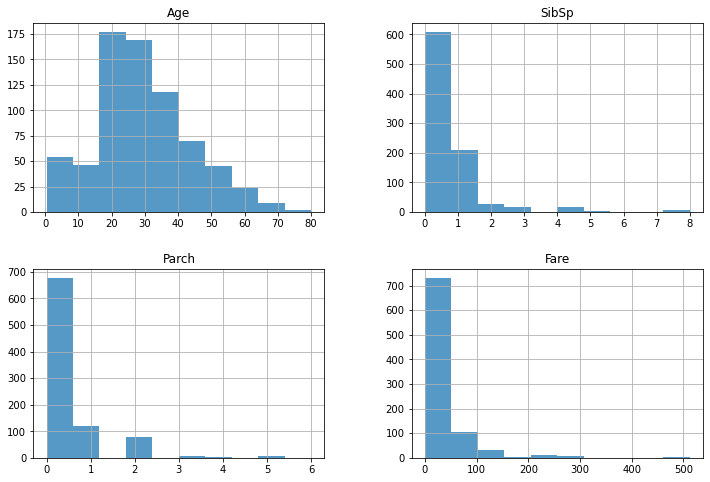

In [27]:
_ = df_data[numerical_cols].hist(figsize=(12, 8), alpha=0.75)

In [28]:
def log_transform(x):
    return np.log(x + 1)

df_data["Fare_log"] = df_data["Fare"].apply(log_transform)

In [29]:
df_data["Fare_log"]

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare_log, Length: 891, dtype: float64

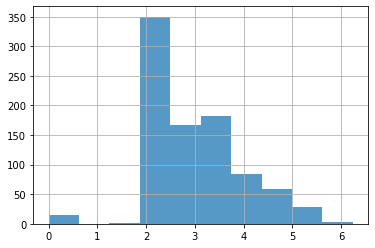

In [30]:
_ = df_data["Fare_log"].hist(alpha=0.75)

In [31]:
df_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
df_data[numerical_cols].corrwith(df_data["Survived"], axis=0, drop=False, method='pearson')

Age     -0.077221
SibSp   -0.035322
Parch    0.081629
Fare     0.257307
dtype: float64

In [33]:
df_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Fare_log'],
      dtype='object')

In [36]:
cols_to_drop = ['Name','PassengerId', 'Ticket']

In [37]:
cols_to_drop.extend(other)

In [38]:
cols_to_drop

['Name', 'PassengerId', 'Ticket', 'Cabin']

In [40]:
numerical_cols

['Age', 'SibSp', 'Parch', 'Fare']

In [41]:
cat_ordinal

['Pclass', 'Sex', 'Embarked', 'Deck']

In [42]:
target

['Survived']

## Questions / Next Steps

**target**
- set target to survived 

**drop:**
- name, passengerid, ticket

**feature engineering**

**categorical data**
- missing data
- label encoder
- one hot encoding

**numerical data**
 - log transform
 - missing value imputation
 - normalization
 


if a simple model with no hyperparams
- train / test spliit

model with hyperpparams
- train / test split
- used kfold on train to select hyperparams

multiple models, each with hypperparams
- nested k-fold


Other:
validate that input data order 
**model training**
- use pipeline for training/validation
- whats transformations are required for logistic regression?
- what transformations are required for random forest, xgboost, neural nets?

**model eval**






**numeric**
- imputation
- clipping
- bucketing
- scaling
- imputation before scaling / bucketing?


**ordinal**
- how to treat these?

**categorical**
- imputation?
- one hot encoding

**new feature creation**


For later:
- make code reusable 
- extend pipeline to include multiple models
- add some testing 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [16]:
def get_features_target(data_path, target_col):
    """splits data into train and test"""
    data = pd.read_csv(data_path / "train.csv")
    target = data.filter(items=[target_col])
    features = data.drop(target_col, axis=1)
    return features, target


def get_deck(val):
    if pd.notnull(val):
        return val[0]
    else:
        return "M"

In [17]:
from sklearn.base import TransformerMixin, BaseEstimator

class Debug(BaseEstimator, TransformerMixin):
    def transform(self, X):
        print(X.shape)
        print(X)
        print("done")
        return X

    def fit(self, X, y=None, **fit_params):
        print("potato")
        return self
    
# ("debug", Debug()),

In [19]:
def feature_transformations():
    """
    feature transformations
    """
    
    # add transforms
    # categorical transforms
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(dtype='int', handle_unknown='ignore'))])

    # numerical transforms
    log_transformer = FunctionTransformer(np.log1p)
    fare_transformer = Pipeline(steps=[
        ('imputer_fare', SimpleImputer(strategy='median')),
        ('log_transform', log_transformer),
        ('min_max_scalar', MinMaxScaler(feature_range=(-1,1)))
    ])
    
    num_transformer = Pipeline(steps=[
        ('imputer_numerical', SimpleImputer(strategy='mean')),
        # ("debug", Debug()),
        ('min_max_scalar', MinMaxScaler(feature_range=(-1,1)))
    ])

        
    # create prepprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, ["Embarked", "Sex", "Pclass"]),
            ('fare', fare_transformer, ["Fare"]),
            ('num', num_transformer, ['Age', 'SibSp', 'Parch'])
        ])
    
    return preprocessor

In [20]:
features, target = get_features_target(data_path, "Survived")
print(features.shape)
print(target.shape)

(891, 11)
(891, 1)


In [21]:
# features["Deck"] = features["Cabin"].apply(get_deck)
# print(features.shape)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=1)

In [37]:
# preprocessor = feature_transformations()

In [32]:
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin

def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names_out'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names_out()]
        else:
            return estimator.get_feature_names_out(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features


preprocessor = feature_transformations()
transformed_data = preprocessor.fit_transform(X_train)
pd.DataFrame(transformed_data, 
             columns=get_ct_feature_names(preprocessor))

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare,Age,SibSp,Parch
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.094892,-0.181201,-0.25,-1.000000
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.600396,0.447097,-1.00,-1.000000
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.406883,-0.558180,-1.00,-0.333333
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.239919,-0.985423,0.25,-0.333333
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.354472,-0.558180,-0.75,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.308576,-0.533049,-1.00,-1.000000
753,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.304893,-0.244031,-1.00,-1.000000
754,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.381463,-0.482785,-1.00,-1.000000
755,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.312303,-0.259607,-1.00,-1.000000


In [47]:
# ------ simple training pipeline ------

from sklearn.ensemble import GradientBoostingClassifier

training_pipeline = Pipeline([
        ('pre', preprocessor),
        ('estimator', GradientBoostingClassifier(max_depth=4, n_estimators=100))
    ])
print(training_pipeline)

training_pipeline.fit(X_train, y_train.values.flatten())

accuracy = training_pipeline.score(X_test, y_test.values.flatten())
print(accuracy)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(dtype='int',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex',
                                                   'Pclass']),
                                                 ('fare',
                                                  Pipeline(steps=[('imputer_fare',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tr

In [ ]:
"""
The parameters variable below is a dictionary that specifies the key:value pairs. 
Note the key must be written, with a double underscore __ separating the module name that we selected 
in the Pipeline() and its parameter. Note the following:

The scaler has no double underscore, as we have specified a list of objects there.
We would search for the best threshold for the selector, i.e., VarianceThreshold(). 
Hence we have specified a list of values [0, 0.0001, 0.001, 0.5] to choose from.
Different values are specified for the n_neighbors, p and leaf_size parameters of the KNeighborsClassifier().

https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

"""
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
Normalizer(), MaxAbsScaler()],
'selector__threshold': [0, 0.001, 0.01],
'classifier__n_neighbors': [1, 3, 5, 7, 10],
'classifier__p': [1, 2],
'classifier__leaf_size': [1, 5, 10, 15]
}

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn import metrics

In [54]:
y_train

,Survived
85,1
195,1
585,1
386,0
371,0
...,...
715,0
767,0
72,0
235,0


In [69]:
training_pipeline = Pipeline([
        ('pre', preprocessor),
        ('estimator', LogisticRegression(solver="liblinear"))
    ])

parameters = {
    'estimator__penalty': ["l1", "l2"],
    'estimator__C':[0.01, 0.1, 1, 10]
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=training_pipeline,
                    param_grid=parameters,
                    scoring='roc_auc',
                    cv=cv,
                    verbose=1,
                    n_jobs=1,
                    error_score="raise")

grid.fit(X_train, y_train.values.flatten())
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
{'estimator__C': 10, 'estimator__penalty': 'l2'}
0.8581338427736733


In [70]:
scores = pd.DataFrame(grid.cv_results_)
scores
# print(scores[['params', 'mean_test_score', 'mean_train_score']])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017338,0.001410,0.009586,0.000801,0.01,l1,"{'estimator__C': 0.01, 'estimator__penalty': '...",0.829567,0.746795,0.743590,0.763355,0.770827,0.034733,8
1,0.016431,0.000703,0.009058,0.000364,0.01,l2,"{'estimator__C': 0.01, 'estimator__penalty': '...",0.898423,0.849122,0.806090,0.828051,0.845421,0.034174,6
2,0.026540,0.006237,0.012039,0.001824,0.1,l1,"{'estimator__C': 0.1, 'estimator__penalty': 'l1'}",0.882474,0.825261,0.803716,0.830306,0.835439,0.028934,7
3,0.016380,0.002214,0.008559,0.001157,0.1,l2,"{'estimator__C': 0.1, 'estimator__penalty': 'l2'}",0.909251,0.854345,0.816892,0.836717,0.854301,0.034381,5
4,0.013705,0.000873,0.006061,0.000233,1,l1,"{'estimator__C': 1, 'estimator__penalty': 'l1'}",0.904308,0.853039,0.826270,0.845620,0.857309,0.028841,3
5,0.011638,0.000288,0.006159,0.000090,1,l2,"{'estimator__C': 1, 'estimator__penalty': 'l2'}",0.904896,0.852802,0.824252,0.844907,0.856714,0.029707,4
6,0.018373,0.001853,0.006889,0.000292,10,l1,"{'estimator__C': 10, 'estimator__penalty': 'l1'}",0.906544,0.851258,0.825795,0.848469,0.858017,0.029707,2
7,0.015865,0.001326,0.008875,0.000975,10,l2,"{'estimator__C': 10, 'estimator__penalty': 'l2'}",0.907250,0.850902,0.825914,0.848469,0.858134,0.029984,1


In [74]:
gs_best = grid.best_estimator_
print(gs_best)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(dtype='int',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex',
                                                   'Pclass']),
                                                 ('fare',
                                                  Pipeline(steps=[('imputer_fare',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tr

In [81]:
preds = gs_best.predict(X_test)
print(preds[:5])

preds_prob = gs_best.predict_proba(X_test)
print(preds_prob[:5])

prob = preds_prob[:, 1]

[1 0 1 1 1]
[[0.14947943 0.85052057]
 [0.91877591 0.08122409]
 [0.11151947 0.88848053]
 [0.33920672 0.66079328]
 [0.07866224 0.92133776]]


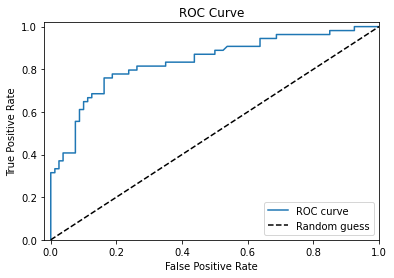

0.8376157407407407


In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test.values.flatten(), prob)
roc_score = roc_auc_score(y_test.values.flatten(), prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()
print(roc_score)

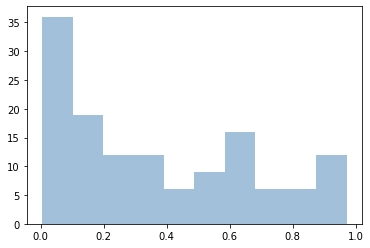

In [89]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
plt.hist(prob, bins=10, color='steelblue', alpha=0.5)
plt.show()

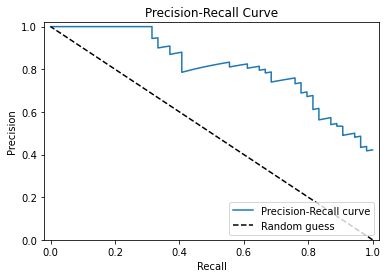

0.8148830783153659


In [118]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test.values.flatten(), prob)
ap_score = average_precision_score(y_test.values.flatten(), prob)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.plot([1, 0], [0, 1], 'k--', label='Random guess')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([-0.02, 1.02])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()
print(ap_score)

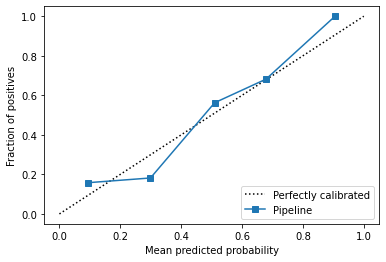

In [121]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(gs_best, X_test, y_test.values.flatten())
plt.show()

### Lets pick a random threshold

In [103]:
y_pred_thresh = (gs_best.predict_proba(X_test)[:,1] >= 0.75).astype(int) # set threshold as 0.7
y_pred_thresh

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0])

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test.values.flatten(), y_pred_thresh))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        80
           1       0.91      0.37      0.53        54

    accuracy                           0.73       134
   macro avg       0.80      0.67      0.67       134
weighted avg       0.78      0.73      0.70       134



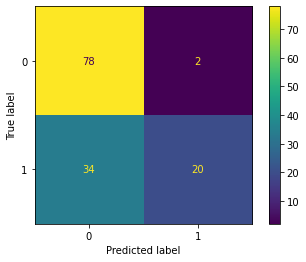

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.values.flatten(), y_pred_thresh, labels=gs_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_best.classes_)
disp.plot()
plt.show()

## REPEAT WITH RANDOM FOREST

In [ ]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)

print(clf.best_score_)

In [125]:
training_pipeline = Pipeline([
        ('pre', preprocessor),
        ('estimator', RandomForestClassifier())
    ])

parameters = {
    'estimator__n_estimators': [10, 50, 100], 
    'estimator__max_features': [3, 5, "sqrt"]
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=training_pipeline,
                    param_grid=parameters,
                    scoring='roc_auc',
                    cv=cv,
                    verbose=1,
                    n_jobs=1,
                    error_score="raise")

grid.fit(X_train, y_train.values.flatten())
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
{'estimator__max_features': 3, 'estimator__n_estimators': 50}
0.8648626251468765


In [126]:
gs_best = grid.best_estimator_
print(gs_best)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(dtype='int',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex',
                                                   'Pclass']),
                                                 ('fare',
                                                  Pipeline(steps=[('imputer_fare',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tr

In [127]:
preds = gs_best.predict(X_test)
print(preds[:5])

preds_prob = gs_best.predict_proba(X_test)
print(preds_prob[:5])

prob = preds_prob[:, 1]

[1 0 1 1 1]
[[0.02       0.98      ]
 [1.         0.        ]
 [0.11933333 0.88066667]
 [0.08285714 0.91714286]
 [0.02       0.98      ]]


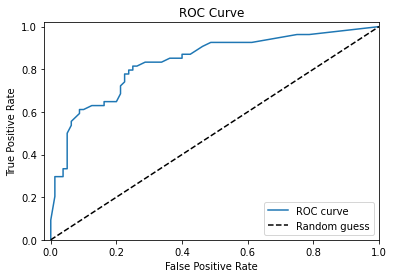

0.8362268518518517


In [128]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test.values.flatten(), prob)
roc_score = roc_auc_score(y_test.values.flatten(), prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()
print(roc_score)

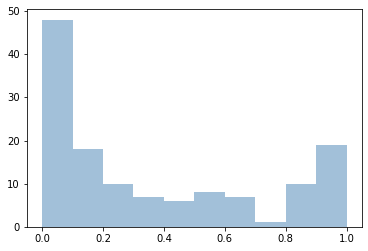

In [129]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
plt.hist(prob, bins=10, color='steelblue', alpha=0.5)
plt.show()

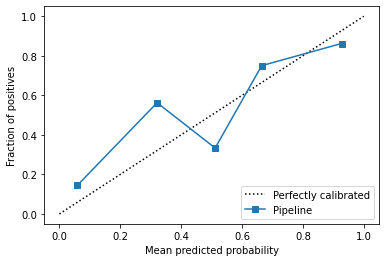

In [130]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(gs_best, X_test, y_test.values.flatten())
plt.show()